# DATA PREPROCESSING

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
hotel_df = pd.read_csv('hotel_bookings_data.csv')

In [3]:
hotel_df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
61366,City Hotel,1,56,2018,February,50,8,0,3,2,...,0,No Deposit,9.0,NaN,0,Personal,109.80,0,1,Canceled
101334,City Hotel,0,88,2018,January,46,7,1,3,1,...,0,No Deposit,195.0,NaN,0,Personal,167.40,0,1,Check-Out
103955,City Hotel,0,20,2019,March,1,1,2,0,2,...,1,No Deposit,NaN,NaN,0,Family,65.00,0,0,Check-Out
17609,Resort Hotel,0,127,2017,December,42,11,2,5,2,...,0,No Deposit,241.0,NaN,0,Personal,62.04,0,1,Check-Out
62341,City Hotel,1,21,2019,March,2,9,1,5,2,...,0,No Deposit,9.0,NaN,0,Personal,67.58,0,1,Canceled


## Data Exploration

In [4]:
# Mengecek jumlah baris dan kolom
hotel_df.shape

(119390, 29)

In [5]:
# Mengecek info dataset
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Terdapat total 29 kolom pada dataset yang digunakan. Berikut adalah daftar kolom beserta keterangannya:

1. `hotel`: Nama hotel.
2. `is_canceled`: Apakah pemesanan dibatalkan (1) atau tidak (0).
3. `lead_time`: Jarak hari antara tanggal pemesanan hingga tanggal kedatangan tamu/pemesan.
4. `arrival_date_year`: Tahun kedatangan tamu/pemesan.
5. `arrival_date_month`: Bulan kedatangan tamu/pemesan.
6. `arrival_date_week_number`: Minggu ke-n (dalam satu tahun) dari kedatangan tamu/pemesan.
7. `arrival_date_day_of_month`: Hari ke-n (dalam satu bulan) dari kedatangan tamu/pemesan.
8. `stays_in_weekend_nights`: Jumlah malam weekends (Sabtu atau Minggu) tamu/pemesan menginap atau pesan di hotel.
9. `stays_in_weekdays_nights` Jumlah malam weekdays (Senin hingga Jumat) tamu/pemesan menginap atau pesan di hotel.
10. `adults`: Jumlah tamu dewasa.
11. `children`: Jumlah tamu anak-anak.
12. `babies`: Jumlah tamu bayi.
13. `meal`: Fasilitas makan yang dipilih.
14. `city`: Kota asal tamu/pemesan.
15. `market_segment`: Segmen tamu/pemesan. Istilah "TA" berarti "Travel Agent" dan "TO" berarti "Tour Operators".
16. `distribution_channel`: Kanal distribusi pemesanan. Istilah "TA" berarti "Travel Agent" dan "TO" berarti "Tour Operators".
17. `is_repeated_guest`: Apakah tamu/pemesan adalah pelanggan berulang (1) atau bukan (0).
18. `previous_cancellations`: Jumlah pemesanan sebelumnya yang dibatalkan oleh tamu/pemesan sebelum pemesanan saat ini.
19. `previous_bookings_not_canceled`: Jumlah pemesanan sebelumnya yang tidak dibatalkan oleh tamu/pemesan sebelum pemesanan saat ini.
20. `booking_changes`: Jumlah perubahan yang dilakukan pada pemesanan dari saat pemesanan hingga saat check-in atau pembatalan.
21. `deposit_type`: "No Deposit" – tanpa deposit; "Non Refund" – deposit senilai total biaya menginap; "Refundable" – deposit dengan nilai di bawah total biaya menginap.
22. `agent`: ID agen perjalanan yang melakukan pemesanan.
23. `company`: ID perusahaan/entitas yang melakukan pemesanan atau bertanggung jawab atas pembayaran pemesanan.
24. `days_in_waiting_list`: Jumlah hari pemesanan berada dalam daftar tunggu sebelum dikonfirmasi kepada tamu/pemesan.
25. `customer_type`: Kategori tamu/pemesan.
26. `adr`: Tarif Harian Rata-rata (dihitung dengan membagi jumlah semua transaksi akomodasi dengan total jumlah malam menginap).
27. `required_car_parking_spaces`: Jumlah tempat parkir mobil yang diperlukan oleh tamu/pemesan.
28. `total_of_special_requests`: Jumlah permintaan khusus yang dibuat oleh tamu/pemesan (misalnya, tempat tidur twin atau lantai tinggi).
29. `reservation_status`: Status pemesanan.

## Feature Extraction

Saya akan membuat beberapa kolom yang dirasa penting namun belum ada di dataset seperti jumlah tamu yang menginap, dan juga jumlah malam tamu menginap. Kolom-kolom ini dibuat dari hasil kalkulasi kolom lain. Selain itu, kolom baru ini nantinya bisa membantu dalam menemukan baris data dengan nilai janggal.

### `number_of_guest`

In [6]:
# Menghitung total tamu yang menginap dalam satu pemesanan
hotel_df['number_of_guest']= hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']

### `length_of_stay`

In [7]:
# Menghitung durasi inap tamu
hotel_df['length_of_stay']= hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_weekdays_nights']

## Missing Values Handling

In [8]:
# Mengecek kolom yang memiliki null valuespada dataset
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [9]:
# Mengecek persentase null value terhadap total baris data
null_column = ['children', 'city', 'agent', 'company', 'number_of_guest']

for col in null_column:
    null_percentage = ((hotel_df[col].isnull().sum()) / (hotel_df.shape[0]) * 100).round(4)
    print('Presentase null pada kolom {} : {}'.format(col, null_percentage))

Presentase null pada kolom children : 0.0034
Presentase null pada kolom city : 0.4087
Presentase null pada kolom agent : 13.6862
Presentase null pada kolom company : 94.3069
Presentase null pada kolom number_of_guest : 0.0034


Dapat diamati bahwa terdapat 4 kolom dengan null value. Persentase null value pada `children` dan `number_of_guest` sangat rendah, yakni di bawah 0.01%. Oleh karena itu, saya memutuskan untuk menghapus baris-baris dengan null value pada kedua kolom tersebut. 

Untuk kolom `city`, null value akan di isi dengan nilai 'unknown'.

Kolom `agent` memiliki persentase null value yang cukup tinggi, mencapai 13%. Sedangkan, persentase null value pada kolom `company` sangat tinggi, yaitu mencapai 94%. Oleh karena itu, diperlukan analisis lebih lanjut untuk menentukan langkah yang tepat dalam penanganannya.

### Menghapus null values pada `children`, `number_of_guest`

In [10]:
# Menghapus null value pada kolom 'children' dan 'number_of_guest'
hotel_df.dropna(subset= ['children', 'number_of_guest'], inplace= True)

### Mengganti  null values pada `city` dengan 'unknown'

In [11]:
# Mengganti null value pada kolom 'city' dengan 'unknown'
hotel_df['city'] = hotel_df['city'].fillna('unknown')

### `agent` & `company` null values handling

Sebelum menentukan tindakan yang tepat untuk menangani null value pada kolom `agent` dan `company`, mari kita lakukan analisa terlebih dahulu. 

Kedua kolom ini berisi data entitas bisnis yang melakukan pemesanan mewakili tamu. Akan tetapi dalam praktiknya, sangat umum pemesan melakukan pemesanan sebagai individu dan bukan entitas bisnis. Pemesanan semacam ini mungkin terkait dengan orang perorangan yang melakukan pemesanan untuk diri mereka sendiri, mewakili anggota keluarga, atau bahkan dalam konteks grup.

Untuk memverifikasi hal ini, kita dapat melakukan pemeriksaan terhadap kolom `customer_type` untuk memberikan wawasan tentang kategori tamu.

In [12]:
# Grouping kategori tamu/pemesan
hotel_df.groupby('customer_type')['customer_type'].value_counts()

customer_type
Bussiness      577
Contract      4076
Family       25120
Personal     89613
Name: count, dtype: int64

Berdasarkan analisis terhadap kolom `customer_type`, terdapat empat nilai unik yang mewakili berbagai jenis tamu/pemesan. Tampak jelas bahwa kategori "Personal" merupakan yang paling umum, menunjukkan bahwa sebagian besar pemesanan dilakukan oleh individu. Sebaliknya, kategori "Business" mencatatkan jumlah pemesanan yang paling sedikit. Ini menandakan bahwa bisnis atau entitas korporat mungkin tidak terlibat secara signifikan dalam pemesanan di dataset ini. Dalam kasus ini, pemesanan atas nama individu mungkin lebih umum, dan karenanya, ID untuk agen atau perusahaan tidak selalu tercatat.

Berdasarkan hal tersebut di atas, saya memutuskan untuk mengganti nilai null pada kolom `agent` dan `company` dengan angka 0, yang menandakan bahwa pesanan dibuat oleh individu.

In [13]:
# Mengisi null value pada kolom 'agent' dan 'company'
hotel_df[['agent', 'company']] = hotel_df[['agent', 'company']].fillna(0)

In [14]:
# Mengecek hasil setelah missing values handling
hotel_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## Abnormal Values Handling

### Menghapus data `number_of_guest` bernilai 0

In [15]:
hotel_df['number_of_guest'].unique()

array([ 2.,  1.,  3.,  4.,  5., 12., 40., 26., 50., 27., 55.,  0., 20.,
        6., 10.])

In [16]:
# Menghapus nilai 0 pada kolom 'number_of_guest'
hotel_df = hotel_df[hotel_df['number_of_guest'] > 0]

### Mengganti data `meal` 'Undefined' dengan 'no meal'

In [17]:
hotel_df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [18]:
# Mengganti nilai 'Undefined' dengan 'no meal'
hotel_df['meal'].replace(to_replace='Undefined', value='no meal', inplace=True)

### Menghapus data `adr` bernilai kurang dari 1

In [19]:
hotel_df['adr'].describe()

count    119206.000000
mean        101.971519
std          50.432866
min          -6.380000
25%          69.500000
50%          94.950000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [20]:
# Filter out 'adr' kurang dari 1
hotel_df= hotel_df[hotel_df['adr'] > 0]

## Penyesuaian Tipe Data

In [21]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117395 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           117395 non-null  object 
 1   is_canceled                     117395 non-null  int64  
 2   lead_time                       117395 non-null  int64  
 3   arrival_date_year               117395 non-null  int64  
 4   arrival_date_month              117395 non-null  object 
 5   arrival_date_week_number        117395 non-null  int64  
 6   arrival_date_day_of_month       117395 non-null  int64  
 7   stays_in_weekend_nights         117395 non-null  int64  
 8   stays_in_weekdays_nights        117395 non-null  int64  
 9   adults                          117395 non-null  int64  
 10  children                        117395 non-null  float64
 11  babies                          117395 non-null  int64  
 12  meal                 

Selain meninjau nama-nama kolom, penting untuk memeriksa tipe data yang digunakan untuk masing-masing kolom. Terdapat beberapa tipe data yang perlu diperhatikan karena kurang sesuai dengan representasi sebenarnya.

- `agent` dan `company`: Meskipun kedua kolom ini berisi angka, mereka hanya berfungsi sebagai ID dan tidak akan dioperasikan secara matematis. Oleh karena itu, lebih tepat untuk mengubah tipe data menjadi string. Hal ini akan mempermudah analisis statistik dan memastikan bahwa data ini tidak dianggap sebagai data numerik.

- `is_canceled` dan `is_repeated_guest`: Kedua kolom ini memuat nilai biner, yang dapat diartikan sebagai True atau False. Mengubahnya menjadi tipe data boolean akan membuat analisis statistik lebih mudah dipahami dan memastikan bahwa data ini tidak dianggap sebagai data numerik.

Dengan melakukan penyesuaian (yang akan dilakukan setelah penanganan duplikat dan missing value), tipe data akan lebih konsisten dengan sifat sebenarnya dari data yang direpresentasikan oleh kolom tersebut, memungkinkan analisis yang lebih tepat dan informatif.

### `agent`, `company`: numeric to string

In [22]:
# Mengubah tipe data kolom 'agent' dan 'company' dari float ke string
hotel_df[['agent', 'company']] = hotel_df[['agent', 'company']].astype(str)

# Menghilangkan nilai desimal dari string
hotel_df['agent'] = hotel_df['agent'].str.rstrip('.0')
hotel_df['company'] = hotel_df['company'].str.rstrip('.0')

### `is_canceled`, `is_repeated_guest`: integer to boolean

In [23]:
# Mengubah tipe data kolom 'is_canceled' dan 'is_repeated_guest' dari integer ke boolean
hotel_df[['is_canceled', 'is_repeated_guest']] = hotel_df[['is_canceled', 'is_repeated_guest']].astype(bool)

In [24]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117395 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           117395 non-null  object 
 1   is_canceled                     117395 non-null  bool   
 2   lead_time                       117395 non-null  int64  
 3   arrival_date_year               117395 non-null  int64  
 4   arrival_date_month              117395 non-null  object 
 5   arrival_date_week_number        117395 non-null  int64  
 6   arrival_date_day_of_month       117395 non-null  int64  
 7   stays_in_weekend_nights         117395 non-null  int64  
 8   stays_in_weekdays_nights        117395 non-null  int64  
 9   adults                          117395 non-null  int64  
 10  children                        117395 non-null  float64
 11  babies                          117395 non-null  int64  
 12  meal                 

## Memastikan konsistensi data kategorikal

Pada proses ini, saya akan melakukan perubahan nilai pada kolom-kolom kategorikal menjadi lowercase. Hal ini bertujuan agar tidak ada nilai yang berbeda yang memiliki arti sama karena perbedaan penggunaan upper/lowercase.

In [25]:
# Membuat list berisi kolom-kolom kategorikal
cat_columns = hotel_df.select_dtypes(include=['object']).columns.tolist()
cat_columns

['hotel',
 'arrival_date_month',
 'meal',
 'city',
 'market_segment',
 'distribution_channel',
 'deposit_type',
 'agent',
 'company',
 'customer_type',
 'reservation_status']

In [26]:
# Mengubah semua nilai pada kolom kategorikal menjadi lowercase
for col in cat_columns:
    hotel_df[col] = hotel_df[col].str.lower()

# Monthly Hotel Booking Analysis Based on Hotel Type

In [27]:
hotel_df.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,number_of_guest,length_of_stay
58392,city hotel,True,279,2018,december,42,12,0,3,2,...,98,,0,personal,110.0,0,0,canceled,2.0,3
31336,resort hotel,False,7,2018,february,52,21,0,3,2,...,24,,0,personal,86.0,0,1,check-out,2.0,3
68045,city hotel,True,183,2019,july,19,11,1,3,2,...,58,,0,personal,130.0,0,0,canceled,2.0,4


## Menghitung jumlah pemesanan tiap bulan

In [46]:
# Grouping dan agregasi jumlah pengunjung berdasarkan hotel, bulan kedatangan, dan tahun kedatangan
monthly_booking = hotel_df.groupby(['hotel', 'arrival_date_month', 'arrival_date_year'])['reservation_status'].count().reset_index()
monthly_booking = monthly_booking.rename(columns= {'arrival_date_month': 'month', 
                                                   'arrival_date_year': 'year',
                                                   'reservation_status': 'number_of_booking'})

monthly_booking

,hotel,month,year,number_of_booking
0,city hotel,april,2018,2328
1,city hotel,april,2019,2545
2,city hotel,august,2018,3886
3,city hotel,august,2019,3928
4,city hotel,december,2017,3305
5,city hotel,december,2018,4162
6,city hotel,february,2017,1573
7,city hotel,february,2018,2433
8,city hotel,january,2017,1200
9,city hotel,january,2018,3060


Terlihat bahwa khusus untuk bulan September dan Oktober memiliki 3 nilai tahun, 2017, 2018, dan 2019. Dikarenakan kita hanya akan melihat jumlah pemesanan perbulannya, maka saya akan menggunakan nilai rata-rata jumlah pemesanan perbulannya. Oleh karena itu, perbedaan jumlah tahun pada dataset kita tidak akan berpengaruh besar.

In [47]:
# Menghitung rata-rata booking bulanan berdasarkan hotel
avg_monthly_booking = monthly_booking.groupby(['hotel', 'month'])['number_of_booking'].mean().round(2).reset_index()
avg_monthly_booking

,hotel,month,number_of_booking
0,city hotel,april,2436.50
1,city hotel,august,3907.00
2,city hotel,december,3733.50
3,city hotel,february,2003.00
4,city hotel,january,2130.00
5,city hotel,july,4059.00
6,city hotel,june,3702.50
7,city hotel,march,1835.00
8,city hotel,may,3182.50
9,city hotel,november,3640.00


Untuk mempermudah dalam membaca data dan melakukan visualisasi, saya akan mengurutkan nilai bulan dengan melakukan mapping angka terlebih dahulu.

In [48]:
# Mapping angka ke nama bulan sesuai urutannya
month_order = {'january': 1, 'february': 2, 'march': 3, 'april': 4, 'may': 5, 'june': 6, 
               'july': 7, 'august': 8, 'september': 9, 'october': 10, 'november': 11, 'december': 12}

avg_monthly_booking['month_num'] = avg_monthly_booking['month'].map(month_order)

# Mengurutkan dataframe berdasarkan hotel dan bulan
avg_monthly_booking = avg_monthly_booking.sort_values(by=['hotel', 'month_num']).drop('month_num', axis=1)
avg_monthly_booking

,hotel,month,number_of_booking
4,city hotel,january,2130.00
3,city hotel,february,2003.00
7,city hotel,march,1835.00
0,city hotel,april,2436.50
8,city hotel,may,3182.50
6,city hotel,june,3702.50
5,city hotel,july,4059.00
1,city hotel,august,3907.00
11,city hotel,september,2658.67
10,city hotel,october,2951.33


## Visualisasi Data

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Jenis grafik yang akan saya gunakan adalah linechart karena kita ingin mengidentifikasi tren serta membandingkan perbedaan nilai dalam periode waktu tertentu.

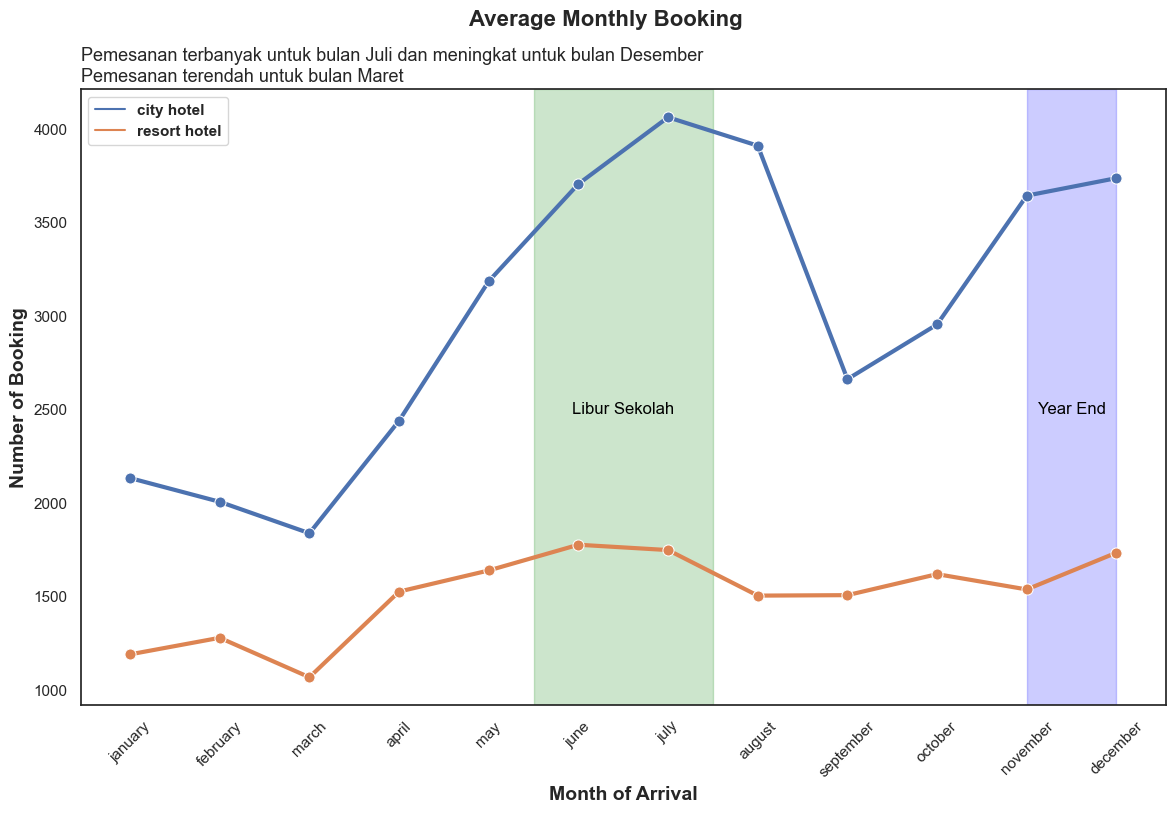

In [54]:
sns.set_style('white')
plt.figure(figsize= (14, 8))
sns.lineplot(data= avg_monthly_booking, x= 'month', y= 'number_of_booking', hue= 'hotel', marker= 'o', markersize= 8, linewidth= 3)
plt.xticks(rotation= 45)

legend = plt.legend(loc= 'upper left')
for text in legend.get_texts():
    text.set_fontweight('bold')

plt.axvspan(4.5, 6.5, color= 'green', alpha= 0.2, label= 'Libur Sekolah')
plt.text(5.5, 2500, 'Libur Sekolah', ha='center', va='center', size=12, color='black')
plt.axvspan(10, 11, color= 'blue', alpha= 0.2, label= 'Year End')
plt.text(10.5, 2500, 'Year End', ha='center', va='center', size=12, color='black')

plt.xlabel('Month of Arrival', size= 14, weight= 'bold')
plt.ylabel('Number of Booking', size= 14, weight= 'bold')
plt.title('Pemesanan terbanyak untuk bulan Juli dan meningkat untuk bulan Desember \nPemesanan terendah untuk bulan Maret', size= 13, loc= 'left')
plt.suptitle('Average Monthly Booking', size= 16, weight= 'bold')

plt.show()

## Interpretasi Visual

Puncak pengunjung tertinggi untuk kedua hotel berada pada bulan Juli yang bertepatan dengan libur sekolah. Kenaikan jumlah pengunjung juga terjadi pada bulan Desember yang bertepatan dengan libur akhir tahun.

Sementara itu, untuk jumlah pengunjung terendah untuk kedua hotel berada pada bulan Maret. Hal ini wajar bulan Maret merupakan waktu penting bagi pelajar yang bersiap untuk ujian. Untuk city hotel, terjadi penurunan jumlah pengunjung yang signifikan dari bulan Agustus ke September. Hal ini kemungkinan disebabkan karena tidak adanya hari libur atau kurangnya daya tarik wisata pada bulan ini.

Secara umum, jumlah pengunjung city hotel lebih tinggi dibanding resort hotel di sepanjang tahunnya.

# Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

## Grouping dan Agregasi Dataframe

In [55]:
hotel_df['length_of_stay'].describe()

count    117395.000000
mean          3.456493
std           2.529268
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: length_of_stay, dtype: float64

In [56]:
# Membagi durasi inap menjadi 6 kategori
def categorize_stay_duration(duration):
    if duration == 1:
        return '1'
    elif 2 <= duration <= 3:
        return '2-3'
    elif 4 <= duration <= 5:
        return '4-5'
    elif 6 <= duration <= 8:
        return '6-8'
    elif 9 <= duration <= 14:
        return '9-14'
    else:
        return '>14'

# Menerapkan fungsi ke kolom 'stay_duration' untuk membuat 'stay_category'
hotel_df['stay_category'] = hotel_df['length_of_stay'].apply(lambda x: categorize_stay_duration(x))

In [57]:
# Grouping dan aggregasi jumlah cancel booking berdasarkan 'hotel' dan 'stay_category'
cancel_booking = hotel_df.groupby(['hotel', 'stay_category']).agg({'is_canceled': 'sum',
                                                                 'reservation_status': 'count'}).reset_index()
cancel_booking = cancel_booking.rename(columns={'is_canceled': 'cancel_count', 'reservation_status': 'booking_count'})

# Menghitung rasio pembatalan
cancel_booking['cancel_rate'] = (cancel_booking['cancel_count'] / cancel_booking['booking_count'] * 100).round(2)

cancel_booking

,hotel,stay_category,cancel_count,booking_count,cancel_rate
0,city hotel,1,4049,12830,31.56
1,city hotel,2-3,19880,42454,46.83
2,city hotel,4-5,6620,17493,37.84
3,city hotel,6-8,1921,4477,42.91
4,city hotel,9-14,382,683,55.93
5,city hotel,>14,117,151,77.48
6,resort hotel,1,1148,7647,15.01
7,resort hotel,2-3,3566,11750,30.35
8,resort hotel,4-5,2381,7572,31.44
9,resort hotel,6-8,3005,9125,32.93


## Visualisasi Data

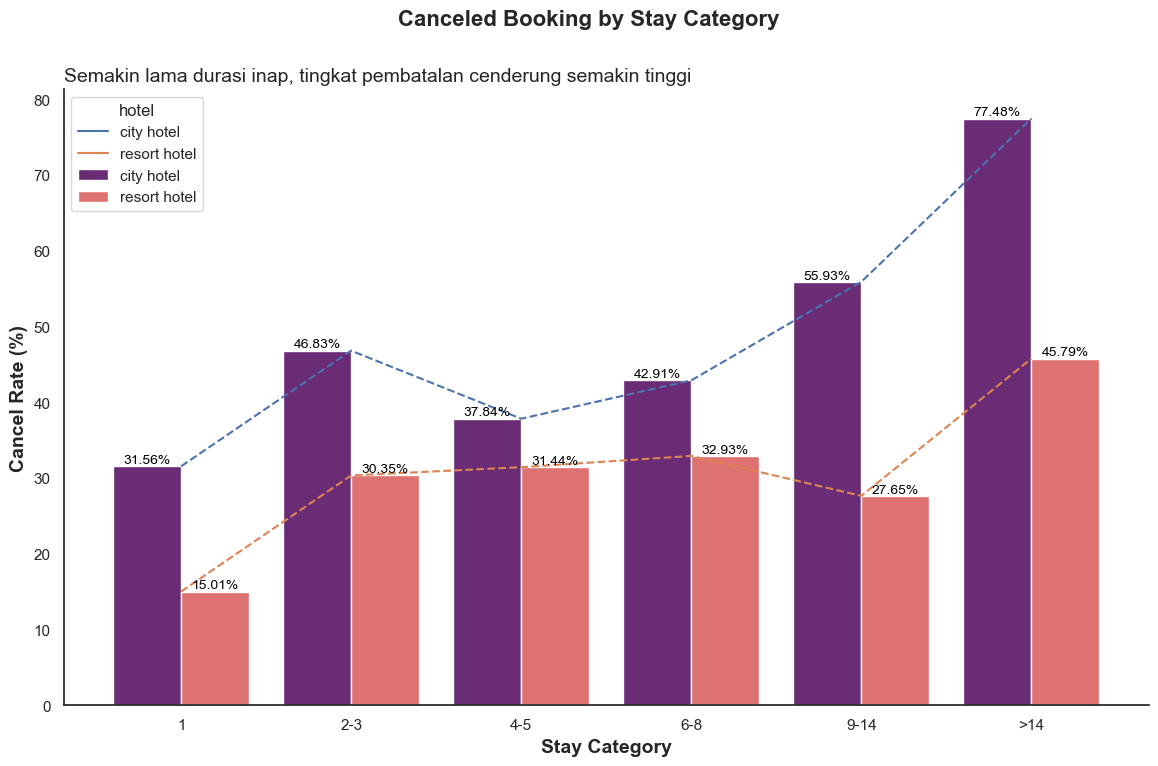

In [58]:
# Membuat bar plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=cancel_booking, x='stay_category', y='cancel_rate',
                 hue='hotel',
                 palette='magma')
plt.xlabel('Stay Category', size=14, weight='bold')
plt.ylabel('Cancel Rate (%)', size=14, weight='bold')
plt.title('Semakin lama durasi inap, tingkat pembatalan cenderung semakin tinggi', size= 14, loc= 'left')
plt.suptitle('Canceled Booking by Stay Category', size= 16, weight= 'bold')
sns.despine()

# Menambahkan label pada setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Menambahkan line plot
sns.lineplot(data=cancel_booking, x='stay_category', y='cancel_rate', hue='hotel', ax=ax, linestyle='--')

plt.show()


## Interpretasi Visual

Terlihat bahwa tingkat pembatalan meningkat dengan durasi menginap yang lebih lama. Misalnya, di city hotel, tingkat pembatalan pada durasi 1 malam adalah 31.56%, sedangkan tingkat pembatalan pada durasi lebih dari 14 malam adalah 77.48%. Ini menunjukkan bahwa semakin lama tamu menginap, semakin tinggi kemungkinan pembatalan.

Kategori durasi inap 2-3 memiliki tingkat pembatalan yang tinggi di city hotel (46.83%) tetapi lebih rendah di resort hotel (30.35%). Ini mungkin mengindikasikan bahwa kategori ini lebih populer atau stabil di resort hotel.

Secara umum, tingkat pembatalan pada resort hotel lebih rendah di semua kategori. Resort hotel mungkin menarik jenis tamu yang lebih cenderung untuk merencanakan liburan atau menginap untuk tujuan liburan atau santai. Tamu yang merencanakan liburan mungkin lebih cenderung untuk tetap pada rencana mereka dan kurang mungkin membatalkan reservasi dibandingkan dengan tamu yang datang untuk tujuan bisnis atau acara khusus di kota.

# Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

In [59]:
hotel_df.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,number_of_guest,length_of_stay,stay_category
38504,resort hotel,False,162,2019,september,28,10,3,7,2,...,,0,personal,188.00,0,1,check-out,2.0,10,9-14
11788,resort hotel,True,155,2019,july,22,30,0,3,2,...,,0,personal,123.33,0,2,canceled,2.0,3,2-3
5384,resort hotel,True,97,2018,june,18,27,2,5,2,...,,0,personal,83.70,0,0,no-show,2.0,7,6-8


In [60]:
hotel_df['lead_time'].describe()

count    117395.000000
mean        105.097849
std         106.913717
min           0.000000
25%          19.000000
50%          71.000000
75%         162.000000
max         709.000000
Name: lead_time, dtype: float64

Terlihat bahwa distribusi dari angka lead time terpaut cukup jauh antar quantile nya. Oleh karena itu, pembagian kategori lead time akan mengambil angka yang dirasa cukup signifikan dari satu kategori ke kategori lain:
- '1 week period' untuk lead time di <= 7 hari
- '1 month period' untuk lead time antara 8 hingga 30 hari
- '3 month period' untuk lead time antara 31 hingga 90 hari
- '6 month period' untuk lead time antara 91 hingga 190 hari
- '1 year period' untuk lead time antara 191 hingga 365 hari
- '> 1 year period' untuk lead time di atas 365 hari

In [61]:
# Membagi lead_time menjadi 6 kategori
def categorize_lead_time(lead_time):
    if lead_time <= 7:
        return '1 week period'
    elif 8 <= lead_time <= 30:
        return '1 month period'
    elif 31 <= lead_time <= 90:
        return '3 month period'
    elif 91 <= lead_time <= 180:
        return '6 month period'
    elif 181 <= lead_time <= 365:
        return '1 year period'
    else:
        return '> 1 year period'

# Menerapkan fungsi ke kolom 'lead_time' untuk membuat 'lead_time_category'
hotel_df['lead_time_category'] = hotel_df['lead_time'].apply(lambda x: categorize_lead_time(x))

In [66]:
# Groping dan aggregasi jumlah booking dan cancel berdasarkan 'hotel' dan 'lead_time_category'
lead_time_vs_cancel_rate = hotel_df.groupby(['hotel', 'lead_time_category']).agg({'is_canceled': 'sum', 'reservation_status': 'count'}).reset_index()

# Menghitung cancel rate
lead_time_vs_cancel_rate['cancel_rate'] = (lead_time_vs_cancel_rate['is_canceled'] / lead_time_vs_cancel_rate['reservation_status'] * 100).round(2)

# Mengurutkan data berdasarkan kategori lead time
category_order = ['1 week period', '1 month period', '3 month period', '6 month period', '1 year period', '> 1 year period']
lead_time_vs_cancel_rate['lead_time_category'] = pd.Categorical(lead_time_vs_cancel_rate['lead_time_category'], categories=category_order, ordered=True)
lead_time_vs_cancel_rate = lead_time_vs_cancel_rate.sort_values(by='lead_time_category')

lead_time_vs_cancel_rate

,hotel,lead_time_category,is_canceled,reservation_status,cancel_rate
1,city hotel,1 week period,1240,10009,12.39
7,resort hotel,1 week period,560,8589,6.52
0,city hotel,1 month period,3867,12389,31.21
6,resort hotel,1 month period,1380,6258,22.05
3,city hotel,3 month period,8282,20651,40.10
9,resort hotel,3 month period,2831,8644,32.75
4,city hotel,6 month period,8735,18157,48.11
10,resort hotel,6 month period,3067,8147,37.65
2,city hotel,1 year period,8923,14190,62.88
8,resort hotel,1 year period,2995,7232,41.41


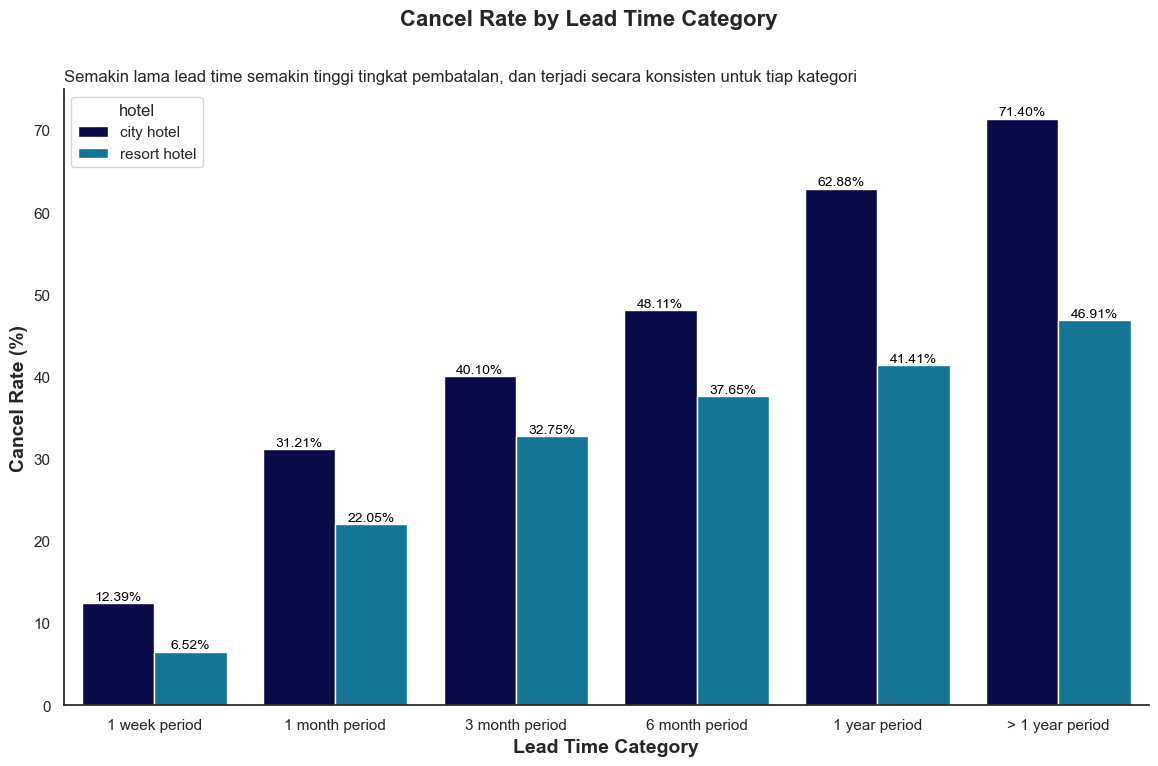

In [82]:
# Membuat bar plot
plt.figure(figsize= (14, 8))
ax= sns.barplot(data=lead_time_vs_cancel_rate, x='lead_time_category', y='cancel_rate', 
                hue='hotel', 
                palette= 'ocean',)
plt.xlabel('Lead Time Category', size= 14, weight= 'bold')
plt.ylabel('Cancel Rate (%)', size= 14, weight= 'bold')
plt.title('Semakin lama lead time semakin tinggi tingkat pembatalan, dan terjadi secara konsisten untuk tiap kategori', loc= 'left')
sns.despine()
plt.suptitle('Cancel Rate by Lead Time Category', size= 16, weight= 'bold')

# Menambahkan label pada setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

## Interpretasi Visual

Berdasarkan grafik di atas, dapat dilihat bahwa semakin lama lead time (periode antara pemesanan dan tanggal check-in), tingkat pembatalan cenderung meningkat. Contohnya, pada "city hotel", ketika lead time adalah "1 week period", tingkat pembatalan sekitar 12.39%, sedangkan pada lead time "1 year period" dan "> 1 year period", tingkat pembatalannya mencapai 62.88% dan 71.40% secara berturut-turut.

Hal serupa terjadi pada "resort hotel". Pada "1 week period", tingkat pembatalan adalah 6.52%, sedangkan pada "1 year period" dan "> 1 year period", tingkat pembatalannya adalah 41.41% dan 46.91%.

Dengan demikian, dapat disimpulkan bahwa semakin lama lead time, tingkat pembatalan cenderung meningkat. Ini mungkin karena semakin jauh tanggal pemesanan dari tanggal check-in, semakin besar kemungkinan ada perubahan rencana atau keadaan tak terduga yang menyebabkan pembatalan reservasi.

#  Rekomendasi Bisnis

Faktor-faktor yang bisa menjadi penyebab pembatalan booking antara lain:

1. **Perubahan rencana perjalanan yang tidak dapat dihindari**

Pelanggan mungkin mengalami perubahan rencana perjalanan yang tidak dapat dihindari, seperti keadaan darurat, keterlambatan penerbangan, atau masalah kesehatan yang mendesak. Hal ini dapat menyebabkan pembatalan yang tidak terduga.

2. **Kebijakan pembatalan yang fleksibel**

Jika hotel menawarkan kebijakan pembatalan yang sangat fleksibel, misalnya dengan penalti yang rendah atau bahkan tanpa biaya pembatalan, maka pelanggan mungkin lebih cenderung untuk membatalkan reservasi mereka.

3. **Kurangnya tindakan konfirmasi/pengingat/follow-up**

Minimnya komunikasi oleh pihak hotel terkait status pemesanan, bisa jadi menyebabkan pelanggan lupa dengan pemesanan mereka atau menganggap pemesanan mereka tidak terlalu penting, terutama untuk pemesan dengan kesibukan yang tinggi.

4. **Kondisi lingkungan atau keamanan**

Faktor eksternal seperti kondisi cuaca buruk atau keadaan darurat lokal dapat memaksa pelanggan untuk membatalkan perjalanan mereka.

5. **Penawaran yang lebih baik oleh kompetitor**

Jika ada alternatif akomodasi yang lebih menarik atau lebih sesuai dengan kebutuhan pemesan, mereka mungkin memilih untuk membatalkan reservasi di hotel dan beralih ke opsi lain.

Untuk mengurangi tingkat pembatalan, terutama pada kategori durasi inap dan lead time yang panjang, langkah-langkah berikut dapat dilakukan:
1. **Menawarkan promo dan insentif khusus untuk pemesanan dengan durasi inap dan lead time yang lebih panjang**

2. **Pemberlakuan harga fleksibel tergantung durasi inap dan lama lead time**

3. **Meningkatkan komunikasi dan engagement dengan pelanggan, terutama yang memesan jauh hari sebelum hari kedatangan**

4. **Fokus meningkatkan pelayanan dan pengalaman untuk pelanggan dengan durasi inap panjang**

5. **Melakukan riset pasar dan survey kepuasan pelanggan untuk terus meningkatkan kualitas dan fasilitas agar bisa unggul dalam kompetisi pasar**